<a href="https://colab.research.google.com/github/ruslanmv/Multiclass_Classification_with_Ensemble_Models/blob/master/Multiclass_Classification_with_Ensemble_Models_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble models for MultiClass Classification

Hello everyone, today we are going to discuss some of the most common ensemble models of classification.

*   Decision Tree Classifier
*   Bagging Classifier
*   Random Forest Classifier
*   AdaBoost Classifier
*   Gradient Boosting Classifier
*   Xgboost Classifier
*   KNeighbors Classifier
*   GaussianNB Classifier
*   Random Forest Classifier
*   Logistic Regression

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability 

We are going to classify a set of wines based on their attributes and use different Ensemble techniques. Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. 

## Averaging methods

In averaging methods, the driving principle is to build several **estimators independently** and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced

Examples: Forests of randomized trees , Bagging methods, …

## Boosting methods:

In boosting methods, base **estimators are built sequentially** and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.


Boosting helps improve our mode by reducing variance!
   
   
Examples: AdaBoost, Gradient Tree Boosting, …




## Decision Tree Classifier

Bagging methods are used as a way to reduce the variance of a base estimator
For example  **Decision Tree**, by introducing randomization into its construction procedure and then making an ensemble out of it

In [ ]:
from sklearn.datasets import load_wine
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
wine = load_wine()

In [ ]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [ ]:
df = sklearn_to_df(datasets.load_wine())

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
wine.target[[10, 80, 140]]
list(wine.target_names)


['class_0', 'class_1', 'class_2']

In [ ]:
X, y = wine.data[:, 11:13], wine.target

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [ ]:
clf.score(X,y)

1.0

## Bagging Classifier

 A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator = clf , max_samples=0.1 , max_features = 0.1, n_estimators= 10)

bg.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.1,
                  max_samples=0.1)

In [ ]:
bg.score(X,y)

0.8539325842696629

<AxesSubplot:>

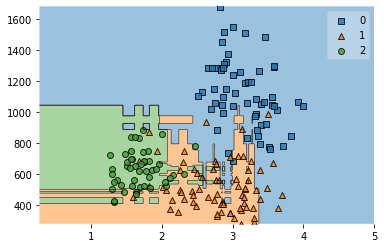

In [ ]:
from mlxtend.plotting import  plot_decision_regions
plot_decision_regions(X,y,bg)

#  Bagging algorithms

Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model

Exmaples: Random forest

## Decision tree
The core unit of random forest classifiers is the decision tree. 
The decision tree is a hierarchical structure that is built using the features (or the independent variables) of a data set. Each node of the decision tree is split according to a measure associated with a subset of the features.
## Random Forest Classifier
 The random forest is a collection of decision trees that are associated with a set of bootstrap samples that are generated from the original data set. The nodes are split based on the entropy (or Gini index) of a selected subset of the features. The subsets that are created from the original data set, using bootstrapping, are of the same size as the original data set.

For classification tasks, the output of the random forest is the class selected by most trees. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10)

In [ ]:
rf.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [ ]:
rf.score(X,y)

0.9887640449438202

<AxesSubplot:>

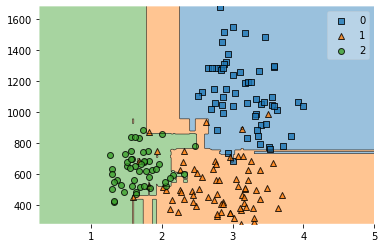

In [ ]:
from mlxtend.plotting import  plot_decision_regions
plot_decision_regions(X,y,rf)

## AdaBoost Classifier

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data.

<AxesSubplot:>

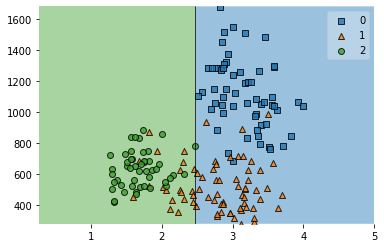

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth= 1)

clf_boost = AdaBoostClassifier(clf, n_estimators = 1)
clf_boost.fit(X,y)
plot_decision_regions(X,y,clf_boost)

0.601123595505618


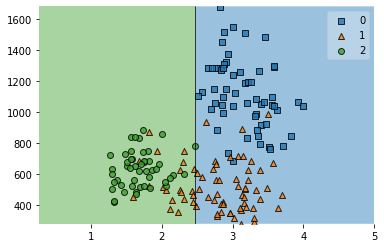

0.7303370786516854


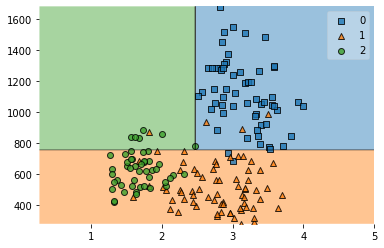

0.8595505617977528


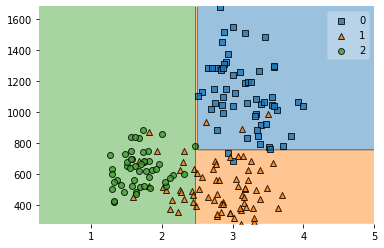

0.8595505617977528


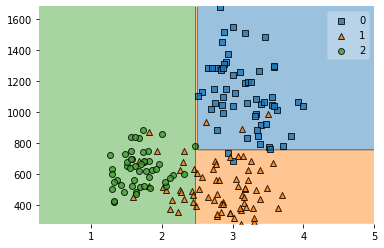

In [ ]:
import matplotlib.pyplot as plt

n_est=[1,2,5,10]

for num_est in n_est:

    clf_boost = AdaBoostClassifier(clf, n_estimators = num_est)
    clf_boost.fit(X,y)
    plot_decision_regions(X,y,clf_boost)
    print(clf_boost.score(X,y))
    plt.show()


# Boosting algorithms:

In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.

Boosting improves machine models' predictive accuracy and performance by converting multiple weak learners into a single strong learning model. Machine learning models can be weak learners or strong learners

Examples:

* AdaBoost : Adaptive boosting
* GBM : Gradient Boosting
* XGBM : Extreme Gradient Boosting
* Light GBM
* CatBoost

### Weak learners
Weak learners have low prediction accuracy, similar to random guessing. They are prone to overfitting—that is, they can't classify data that varies too much from their original dataset. For example, if you train the model to identify cats as animals with pointed ears, it might fail to recognize a cat whose ears are curled.

### Strong learners
Strong learners have higher prediction accuracy. Boosting converts a system of weak learners into a single strong learning system. For example, to identify the cat image, it combines a weak learner that guesses for pointy ears and another learner that guesses for cat-shaped eyes. After analyzing the animal image for pointy ears, the system analyzes it once again for cat-shaped eyes. This improves the system's overall accuracy.

## Gradient Boosting Classifier

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions.
GradientBoostingClassifier supports both binary and multi-class classification.
The number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8888888888888888

##  Xgboost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(x_train,y_train)
model.score(x_test, y_test)


0.8888888888888888

XGBoost gained significant favor in the last few years as a result of helping individuals and teams win virtually every Kaggle structured data competition. In these competitions, companies and researchers post data after which statisticians and data miners compete to produce the best models for predicting and describing the data.

# Ensemble Learning:
* Homogeneous ensemble methods : Bagging , Boosting
* Heterogeneous ensemble methods: Stacking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import six

In [ ]:
#!pip install --ignore-installed  mlxtend

In [ ]:
from mlxtend.classifier import StackingClassifier

## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.
Using KNeighborsClassifier and then the argument inside determines how many nearest neighbors you want your datapoint to look at. There is no rule of thumb for how many neighbors you should look at

In [ ]:
clfk = KNeighborsClassifier(n_neighbors=1)

# GaussianNB Classifier

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [ ]:
clfg = GaussianNB()


## Random Forest Classifier
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key.  While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. 

So the prerequisites for random forest to perform well are:

1. There needs to be some actual signal in our features so that models built using those features do better than random guessing.

2. The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.


In [ ]:

clfr = RandomForestClassifier()


## Logistic Regression

In statistics, the  logistic model  is a statistical model that models the probability of one event (out of two alternatives) taking place by having the log-odds (the logarithm of the odds) for the event be a linear combination of one or more independent variables ("predictors"). 

In regression analysis, logistic regression is estimating the parameters of a logistic model (the coefficients in the linear combination). 

Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

$$Logit(pi) = 1/(1+ exp(-pi))$$

$$ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k$$

In [ ]:
lr=LogisticRegression()

# StackingClassifier

Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

In [ ]:
sclf = StackingClassifier(classifiers=[clfk, clfg, clfr], meta_classifier= lr)


Acc 0.7222222222222222


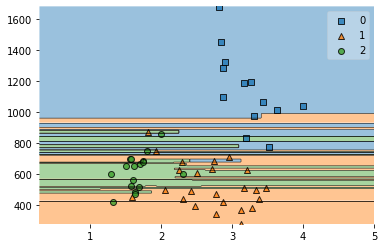

Acc 0.9074074074074074


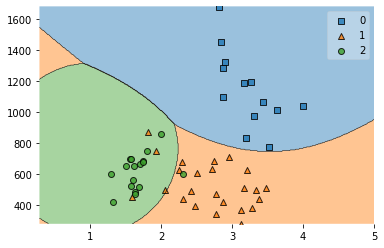

Acc 0.9074074074074074


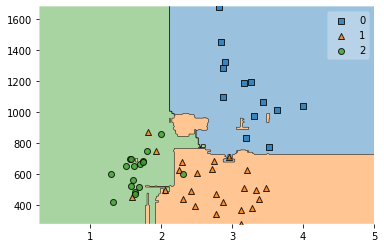

Acc 0.8703703703703703


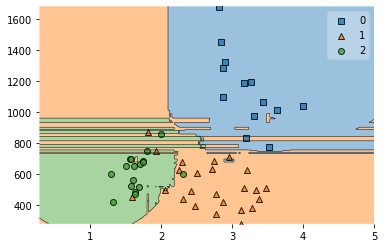

In [ ]:
clfs = [clfk, clfg, clfr,sclf]
for classifier in clfs:
  classifier.fit(x_train,y_train)
  print('Acc', classifier.score(x_test,y_test))
  plot_decision_regions(x_test, y_test,classifier)
  plt.show()


In practice, a stacking predictor predicts as good as the best predictor of the base layer and even sometimes outperforms it by combining the different strengths of the these predictors. However, training a stacking predictor is computationally expensive.

### The following are common limitations of boosting modes:
Vulnerability to outlier data
Boosting models are vulnerable to outliers or data values that are different from the rest of the dataset. Because each model attempts to correct the faults of its predecessor, outliers can skew results significantly.
Real-time implementation
You might also find it challenging to use boosting for real-time implementation because the algorithm is more complex than other processes. Boosting methods have high adaptability, so you can use a wide variety of model parameters that immediately affect the model's performance

## Boosting compared to bagging
Boosting and bagging are the two common ensemble methods that improve prediction accuracy. The main difference between these learning methods is the method of training. In bagging, data scientists improve the accuracy of weak learners by training several of them at once on multiple datasets. In contrast, boosting trains weak learners one after another.

**Congratulations!** We have discussed some of the most common ensemble models for multiclass classification.